In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=2, suppress=True)

%matplotlib inline

In [3]:
# lImg_fname = 'data/stars/test1.png'
# rImg_fname = 'data/stars/test2.png'
lImg_fname = 'data/stars/Stars-3072x2304-1.png'
rImg_fname = 'data/stars/Stars-3072x2304-2.png'

In [4]:
lImg = Image.open(lImg_fname)
rImg = Image.open(rImg_fname)
l_data = lImg.load() # pixmap of lImg
r_data = rImg.load() # pixmap of rImg

In [5]:
w, h = width, height = lImg.size

In [6]:
x_c, y_c = (width) / 2., (height) / 2. # center coordinates

In [7]:
# fname_640x480 = 'data/coords_640x480.txt'
fname_3072x2304 = 'data/coords_3072x2304.txt'
# fname = fname_640x480
fname = fname_3072x2304
coords = np.loadtxt(fname)

In [8]:
lX = coords[:, 0] # leftX coordinates
lY = coords[:, 1] # leftY coordinates
rX = coords[:, 2] # rightX coordinates
rY = coords[:, 3] # rightY coordinates

N = coords.shape[0] # number of pairs of points
M = coords.shape[1] # lX, lY, rX, rY == 4

In [9]:
print 'Input coordinates from %r: \n' % fname, coords, '\n'

Input coordinates from 'data/coords_3072x2304.txt': 
[[ 1300.  1141.  1547.  1188.]
 [ 1460.  1252.  1705.  1297.]
 [ 1756.  1236.  2001.  1279.]
 [ 1091.  1019.  1340.  1069.]] 



In [10]:
# Solve the system of linear equations via pseudo inversion

# Below lX, lY, rX, rY mean lX[i], lY[i], rX[i], rY[i]:
# rX = a*lX + b*lY + e + e_2*rX*(rX**2 + rY**2)
# rY = c*lX + d*lY + f + e_2*rY*(rX**2 + rY**2)

# xi = A*z + nu,      where:

# xi.T = rX[0], rY[0] ... rX[N-1], rY[N-1]
# z.T = a, b, c, d, e, f, e_2  -- 6 affine coeff-s + distortion coeff
# nu -- vector of inaccuracy (?) I don't use it right now

# A = [ # L = N-1   -- Last 
# lX[0] lY[0]  0     0      1  0  rX[0]*(rX[0]**2 + rY[0]**2) ;
# 0     0      lX[0] lY[0]  0  1  rY[0]*(rX[0]**2 + rY[0]**2) ;
# ...                                                          ... ;
# ...                                                          ... ;
# ...                                                          ... ;
# lX[L] lY[L]  0     0      1  0  rX[L]*(rX[L]**2 + rY[L]**2) ;
# 0     0      lX[L] lY[L]  0  1  rY[L]*(rX[L]**2 + rY[L]**2) . ]


In [11]:
xi = np.zeros(2*N)
z = np.zeros(7)
arr = np.zeros((2*N, 7)) # matrix A

In [12]:
for i in xrange(N): # fill the xi vector
    xi[2*i] = rX[i]
    xi[2*i + 1] = rY[i]

In [13]:
for i in xrange(N): # fill the A matrix
    r = (rX[i]-x_c)**2 + (rY[i]-y_c)**2

    tmp = (rX[i] - x_c) * r
#     tmp = 0 # for simple affine6 algorithm!; comment out other tmps
    arr[2*i] = [lX[i], lY[i], 0, 0, 1, 0, tmp]
    
    tmp = (rY[i] - y_c) * r
    arr[2*i + 1] = [0, 0, lX[i], lY[i], 0, 1, tmp]


In [15]:
print 'xi = A*z + nu'
print 'xi:\n', xi
print 'A:\n', arr, '\n'


xi = A*z + nu
xi:
[ 1547.  1188.  1705.  1297.  2001.  1279.  1340.  1069.]
A:
[[  1.30e+03   1.14e+03   0.00e+00   0.00e+00   1.00e+00   0.00e+00
    1.56e+04]
 [  0.00e+00   0.00e+00   1.30e+03   1.14e+03   0.00e+00   1.00e+00
    5.10e+04]
 [  1.46e+03   1.25e+03   0.00e+00   0.00e+00   1.00e+00   0.00e+00
    8.38e+06]
 [  0.00e+00   0.00e+00   1.46e+03   1.25e+03   0.00e+00   1.00e+00
    7.19e+06]
 [  1.76e+03   1.24e+03   0.00e+00   0.00e+00   1.00e+00   0.00e+00
    1.08e+08]
 [  0.00e+00   0.00e+00   1.76e+03   1.24e+03   0.00e+00   1.00e+00
    2.95e+07]
 [  1.09e+03   1.02e+03   0.00e+00   0.00e+00   1.00e+00   0.00e+00
   -8.88e+06]
 [  0.00e+00   0.00e+00   1.09e+03   1.02e+03   0.00e+00   1.00e+00
   -3.76e+06]] 



In [16]:
pinv_arr = np.linalg.pinv(arr) # Calculate pseudo inverted A
z = np.dot(pinv_arr, xi)

In [20]:
np.set_printoptions(precision=10, suppress=True)
print 'Result:'
print 'z:', z
np.set_printoptions(precision=2, suppress=True)

Result:
z: [   0.9966539232   -0.0124225417   -0.0076081913    0.9902333309
  265.4233838434   68.2017050912    0.0000000075]


In [21]:
for i in xrange(width):
    for j in xrange(height):
        r, g, b = l_data[i, j]
        l_data[i, j] = r, 0, 0  # color lImg in red
        
        r, g, b = r_data[i, j]
        r_data[i, j] = 0, g, 0  # color rImg in green

In [22]:
l_data[x_c, y_c] = 255, 255, 255    # Mark the center
l_data[x_c-1, y_c] = 255, 255, 255
l_data[x_c+1, y_c] = 255, 255, 255
l_data[x_c, y_c-1] = 255, 255, 255
l_data[x_c, y_c+1] = 255, 255, 255

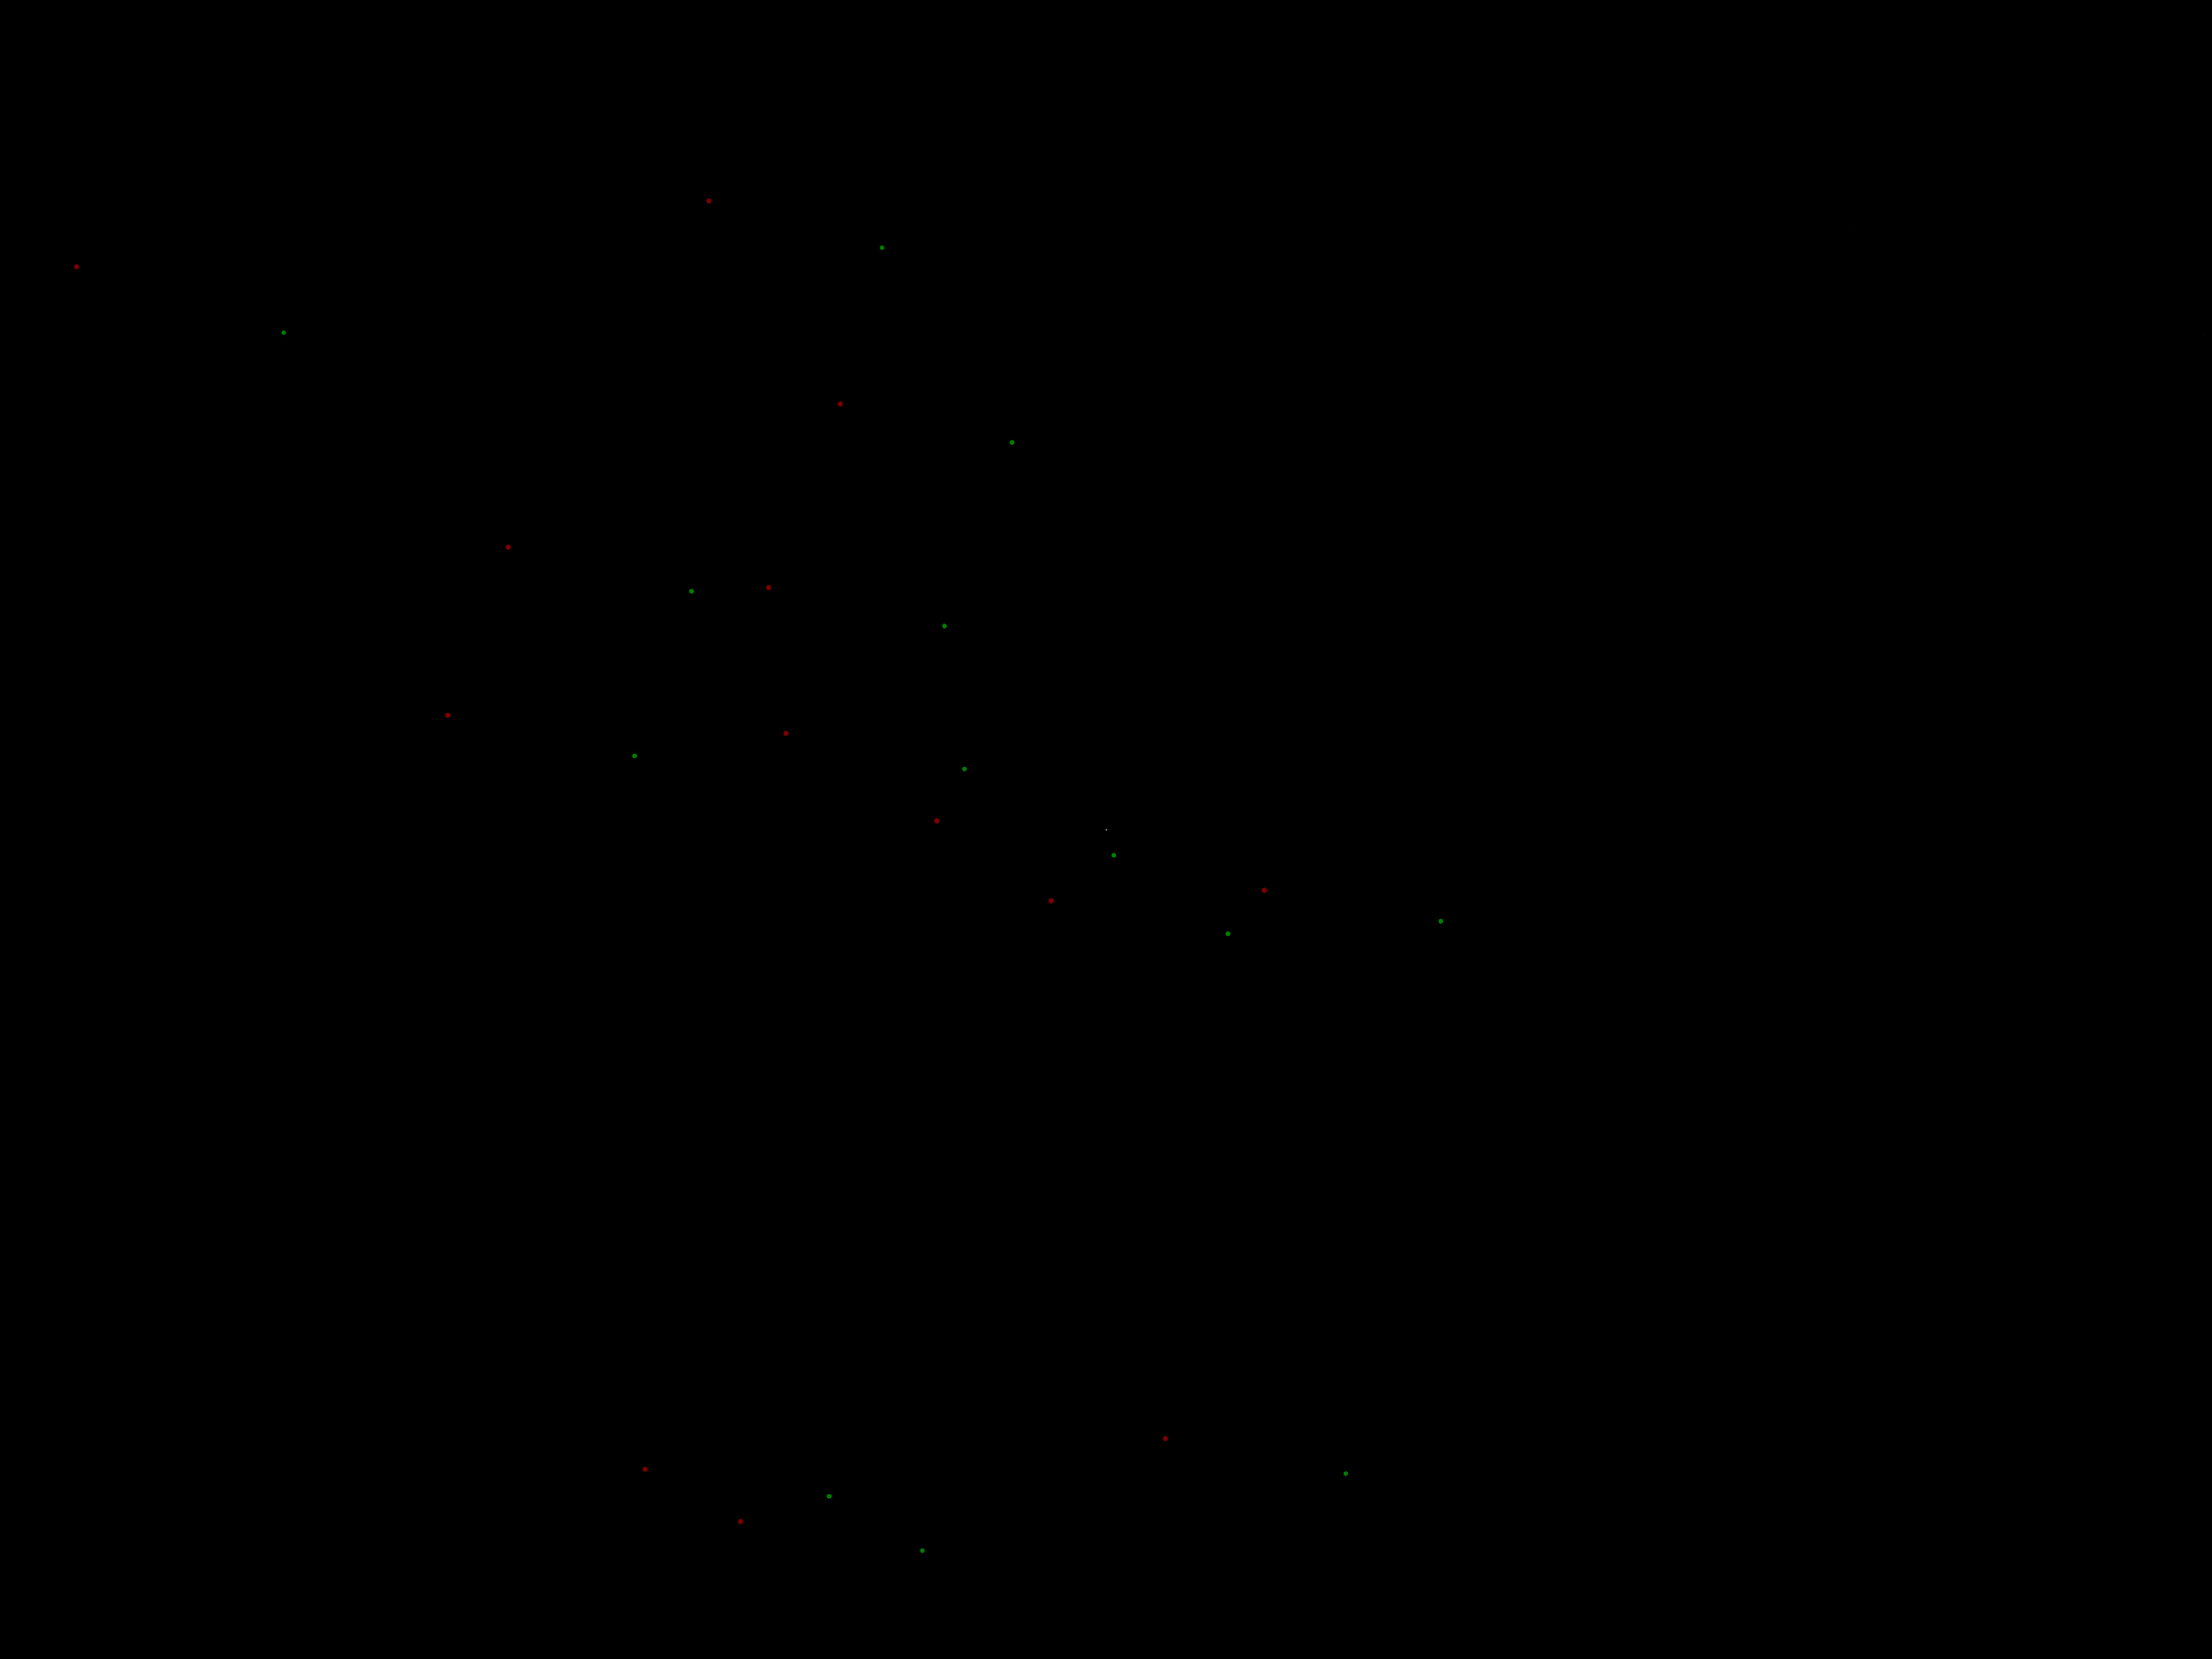

In [23]:
Image.blend(lImg, rImg, alpha=0.5) # Initial blend

In [24]:
a = float(z[0])
b = float(z[1])
c = float(z[2])
d = float(z[3])
e = float(z[4])
f = float(z[5])
e_2 = float(z[6])
data = (a, b, e, c, d, f) # affine coefficients

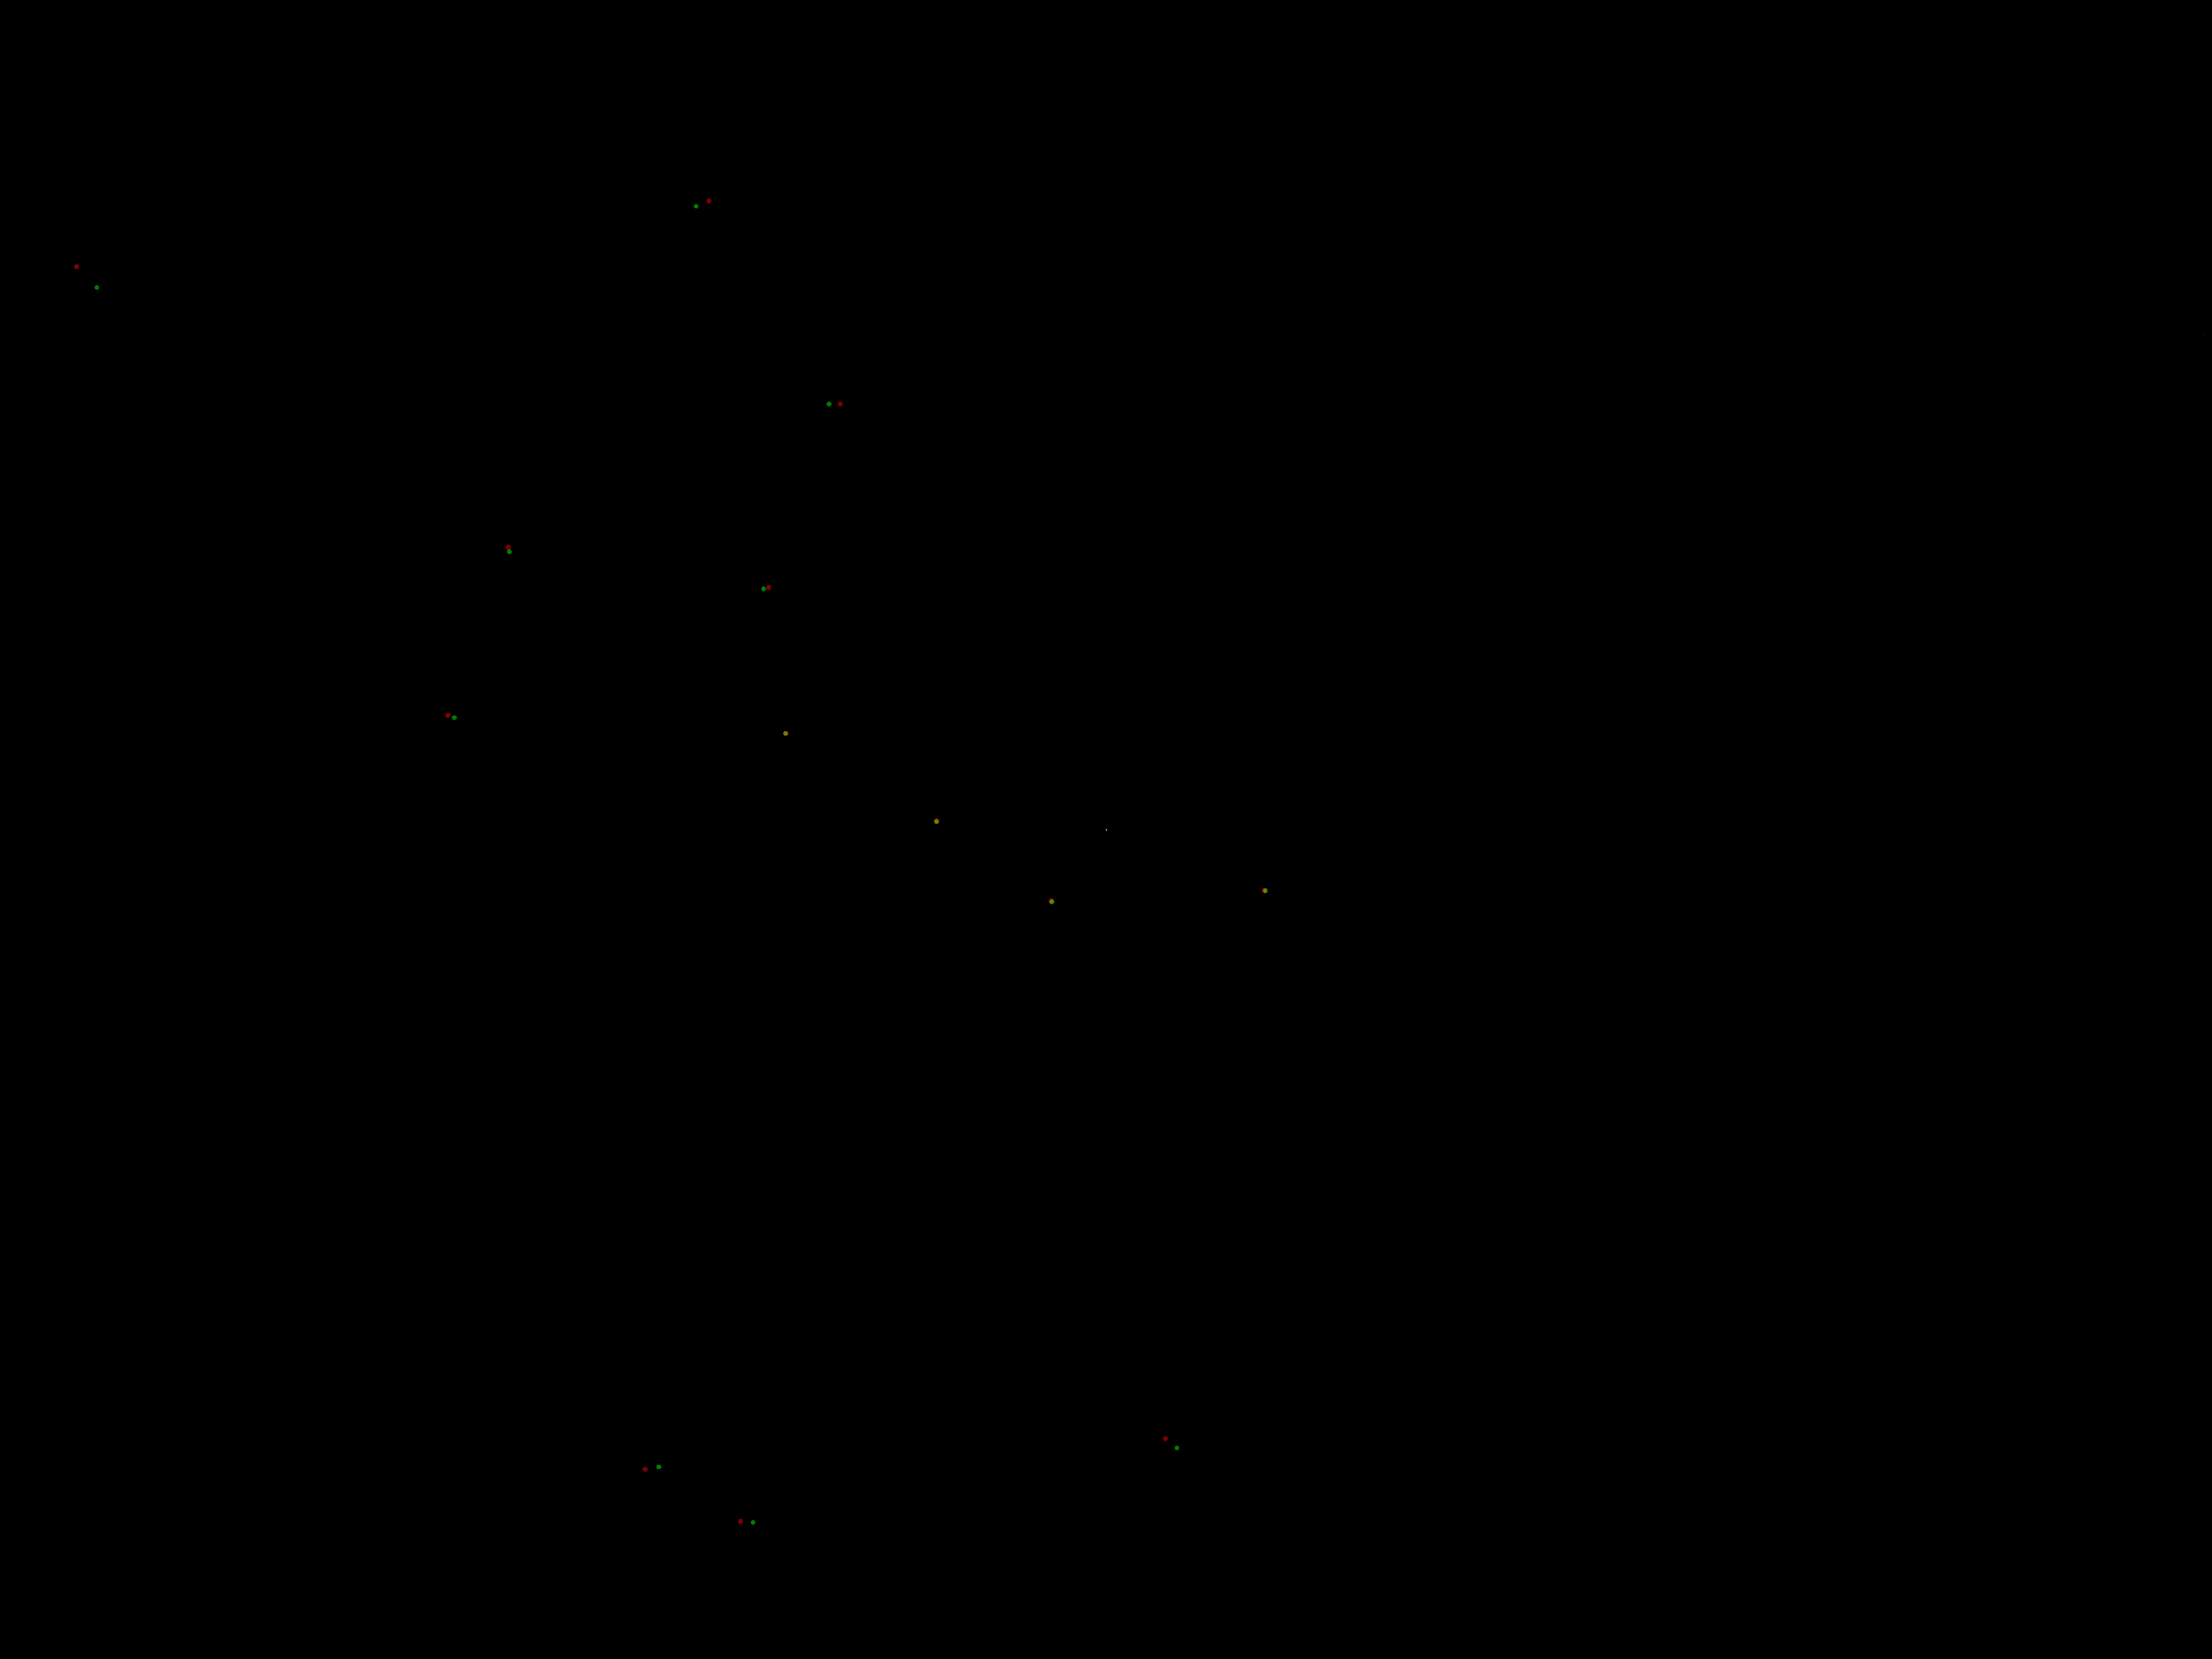

In [25]:
aff_rImg = rImg.transform(rImg.size, Image.AFFINE, data, 
               resample=Image.BICUBIC)

Image.blend(lImg, aff_rImg, alpha=0.5) # only affine transform

In [26]:
data = z
a = float(data[0])
b = float(data[1])
c = float(data[2])
d = float(data[3])
e = float(data[4])
f = float(data[5])
e_2 = float(data[6])

znam = a*d - b*c
inv_a = d / znam
inv_b = -b / znam
inv_c = -c / znam
inv_d = a / znam

In [27]:
def spec_transform(x, y, data=None):
    """Special transform: affine + distortion
    data = [a, b, c, d, e, f, e_2]
    lImg -> rImg"""
    
    r = (x-x_c)**2 + (y-y_c)**2
    
    nx = a*x + b*y + e + e_2*(x-x_c)*r
    ny = c*x + d*y + f + e_2*(y-y_c)*r
    
    return (round(nx), round(ny))



In [28]:
def inv_transform(x, y, data=None):
    """Inverted Special transform: affine + distortion
    data = [a, b, c, d, e, f, e_2]
    right Img -> left Img"""
    
    r = (x-x_c)**2 + (y-y_c)**2
    fac = 1 - e_2*r  # factor
    
    orig_x = (x*fac - e)*inv_a + (y*fac - f)*inv_b + e_2*r*x_c
    orig_y = (x*fac - e)*inv_c + (y*fac - f)*inv_d + e_2*r*y_c
    
    return (round(orig_x), round(orig_y))


In [29]:
coords_right = np.zeros((width, height, 2))

In [30]:
for i in xrange(width): #Calculating new (right) coordinates
    for j in xrange(height):
        rx, ry = spec_transform(i, j, z)
        coords_right[i, j, 0], coords_right[i, j, 1] = rx, ry
        

In [31]:
print 'Coords_right:\n', coords_right, '\n'


Coords_right:
[[[  223.    36.]
  [  223.    37.]
  [  223.    38.]
  ..., 
  [  194.  2378.]
  [  194.  2380.]
  [  194.  2381.]]

 [[  224.    36.]
  [  224.    37.]
  [  224.    38.]
  ..., 
  [  195.  2378.]
  [  195.  2379.]
  [  195.  2381.]]

 [[  225.    36.]
  [  225.    37.]
  [  225.    38.]
  ..., 
  [  197.  2378.]
  [  196.  2379.]
  [  196.  2380.]]

 ..., 
 [[ 3366.    13.]
  [ 3366.    14.]
  [ 3366.    15.]
  ..., 
  [ 3338.  2355.]
  [ 3338.  2356.]
  [ 3338.  2357.]]

 [[ 3368.    13.]
  [ 3368.    14.]
  [ 3367.    15.]
  ..., 
  [ 3339.  2355.]
  [ 3339.  2356.]
  [ 3339.  2357.]]

 [[ 3369.    13.]
  [ 3369.    14.]
  [ 3369.    15.]
  ..., 
  [ 3340.  2355.]
  [ 3340.  2356.]
  [ 3340.  2357.]]] 



In [32]:
# Crop rect out of calculated right img
l_edge = max(coords_right[0, :, 0])
print 'l_edge:', l_edge

r_edge = min(coords_right[width-1, :, 0])
print 'r_edge:', r_edge

t_edge = max(coords_right[:, 0, 1])
print 't_edge:', t_edge

b_edge = min(coords_right[:, height-1, 1])
print 'b_edge:', b_edge

l_edge: 227.0
r_edge: 3336.0
t_edge: 47.0
b_edge: 2347.0


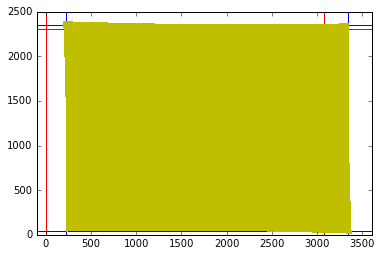

In [33]:
plt.plot(coords_right[:,:,0], coords_right[:,:,1], 'y,')

xmin, xmax = plt.xlim()
plt.xlim(xmin-100, xmax+100)
xmin, xmax = plt.xlim()

ymin, ymax = plt.ylim()

# Left image rect
left_x = [0, width-1]
left_y = [0, height-1]
plt.vlines(left_x, ymin, ymax, colors='r')
plt.hlines(left_y, xmin, xmax, colors='r')

# Right cropped img rect
right_x = [l_edge, r_edge]
right_y = [t_edge, b_edge]
plt.vlines(right_x, ymin, ymax, colors='b')
plt.hlines(right_y, xmin, xmax, colors='b')


plt.show()

In [34]:
# Edges (right spec_transformed img)
left = max(list(coords_right[0, :, 0]) + [0])
top = max(list(coords_right[:, 0, 1]) + [0])
right = min(list(coords_right[-1, :, 0]) + [width-1])
bottom = min(list(coords_right[:, -1, 1]) + [height-1])

In [35]:
print 'Edges (right spec_transformed img)'
print 'left', left
print 'top', top
print 'right', right
print 'bottom', bottom

# Corners of box:
# (left, top); (right, bottom)

Edges (right spec_transformed img)
left 227.0
top 47.0
right 3071
bottom 2303


In [36]:
nw = int(right+1 - left)
nh = int(bottom+1 - top)

print 'New size:', nw, nh

New size: 2845 2257


In [37]:
new_lImg = Image.new('RGB', size=(nw, nh))
new_rImg = Image.new('RGB', size=(nw, nh))
new_lImg_pix = new_lImg.load()
new_rImg_pix = new_rImg.load()

n_left_coords = np.zeros((nw, nh, 2))

In [38]:
left = int(left)
right = int(right)
top = int(top)
bottom = int (bottom)

# Let's calculate backwards our original coordinates 
# of the left image
for x in xrange(left, right+1):
    for y in xrange(top, bottom+1):
        orig_x, orig_y = inv_transform(x, y)
        
# Throw away points out of original left img area(box)
        if orig_x < 0:
            orig_x = 0
        if orig_y < 0:
            orig_y = 0
            
        if orig_x >= width:
            orig_x = width-1
        if orig_y >= height:
            orig_y = height-1
        
        n_left_coords[x-left, y-top, 0] = orig_x
        n_left_coords[x-left, y-top, 1] = orig_y
        
        new_lImg_pix[x-left, y-top] = l_data[orig_x, orig_y]
        new_rImg_pix[x-left, y-top] = r_data[x, y]


In [39]:
print n_left_coords

[[[    0.     3.]
  [    0.     4.]
  [    0.     5.]
  ..., 
  [   19.  2228.]
  [   19.  2229.]
  [   19.  2230.]]

 [[    0.     3.]
  [    0.     4.]
  [    0.     5.]
  ..., 
  [   20.  2228.]
  [   20.  2229.]
  [   20.  2230.]]

 [[    0.     3.]
  [    0.     4.]
  [    0.     5.]
  ..., 
  [   21.  2228.]
  [   21.  2229.]
  [   21.  2230.]]

 ..., 
 [[ 2772.    29.]
  [ 2772.    30.]
  [ 2772.    31.]
  ..., 
  [ 2798.  2244.]
  [ 2798.  2245.]
  [ 2798.  2246.]]

 [[ 2773.    29.]
  [ 2773.    30.]
  [ 2773.    31.]
  ..., 
  [ 2799.  2244.]
  [ 2799.  2245.]
  [ 2799.  2246.]]

 [[ 2773.    29.]
  [ 2773.    30.]
  [ 2774.    31.]
  ..., 
  [ 2800.  2244.]
  [ 2800.  2245.]
  [ 2800.  2246.]]]


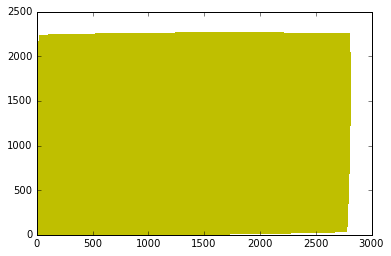

In [40]:
plt.plot(n_left_coords[:,:,0], n_left_coords[:,:,1], ',y')
plt.show()

In [41]:
t = n_left_coords
x_mask = (t[:,:,0] > 0) * (t[:,:,0] < width)
y_mask = (t[:,:,1] > 0) * (t[:,:,1] < height)
mask = x_mask * y_mask

In [42]:
print 'x_mask:\n', x_mask
print 'y_mask:\n', y_mask
print 'mask:\n', mask

x_mask:
[[False False False ...,  True  True  True]
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]]
y_mask:
[[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]]
mask:
[[False False False ...,  True  True  True]
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]]


In [43]:
x_ok, y_ok = np.where(mask)

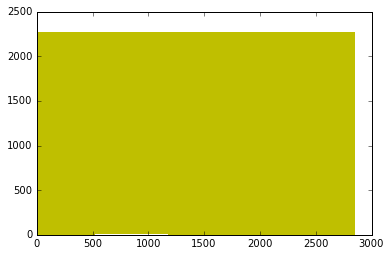

In [44]:

plt.plot(x_ok, y_ok, ',y')


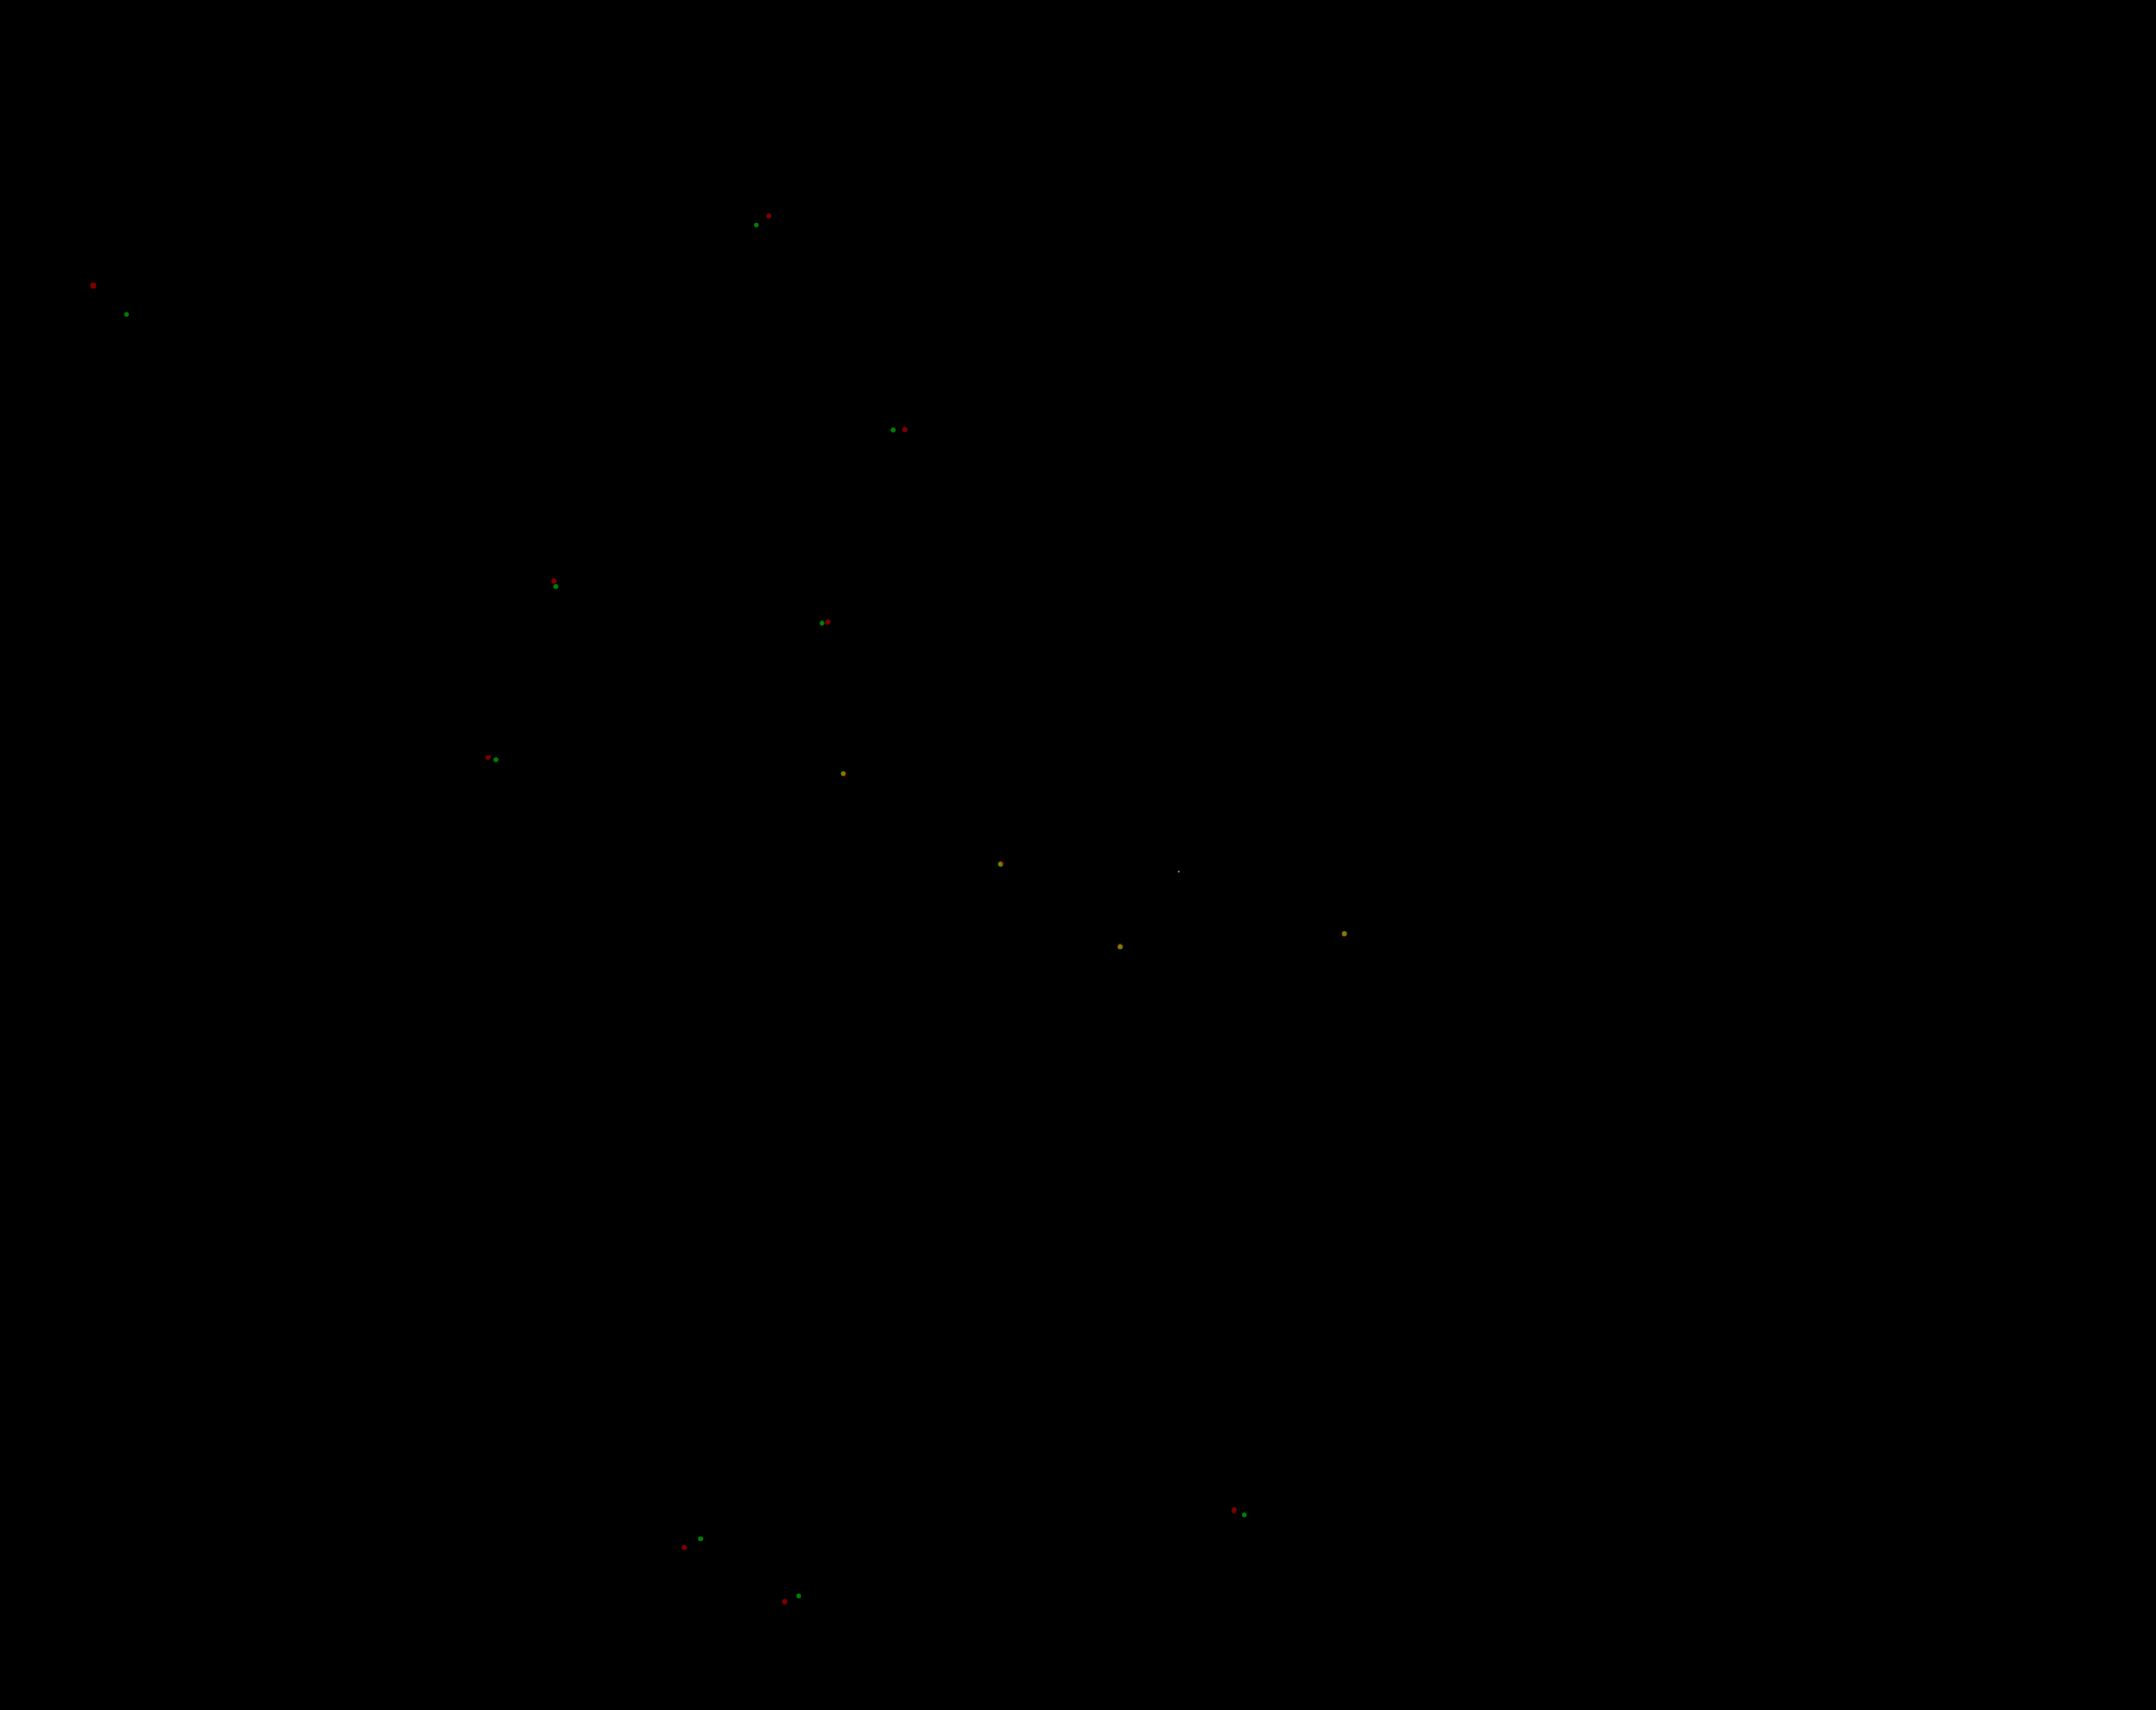

In [45]:
# Blend of affine transformed with distortion
Image.blend(new_lImg, new_rImg, alpha=0.5)